In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt

from src.data import conex_file_parser
from src.profile_functions import anormal, gaisser_hillas, gaisser_hillas_six, usp
from src.util import get_fit

Welcome to JupyROOT 6.26/10


### Load a single profile

In [2]:
input_files = '../data/conex/p_17-20eV_60deg/sibyll23d/*.root'
parser = conex_file_parser(input_files, ['Xdep', 'dEdX'], 1)
x, y = next(parser)

### Helper function to get fit and draw

In [3]:
def fit_and_draw(f, x, y):
  popt, perr, stat = get_fit(f, x, y)

  plt.fill_between(x, y, color = 'navy', alpha = 0.5, lw = 0)
  plt.plot(x, f(x, *popt), '-', color = 'navy', alpha = 0.7, lw = 2)
  plt.show()

  print('parameters: ', popt)
  print('errors: ', perr)

### USP function

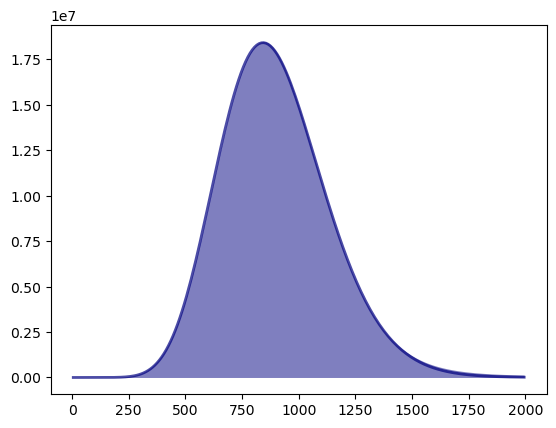

parameters:  [1.84259153e+07 8.42318367e+02 2.30610059e+02 2.40847784e-01]
errors:  [1.62960406e+04 3.71164494e-01 2.35411940e-01 2.50083921e-03]


In [8]:
fit_and_draw(usp, x, y)

### Asymetric gaussial profile

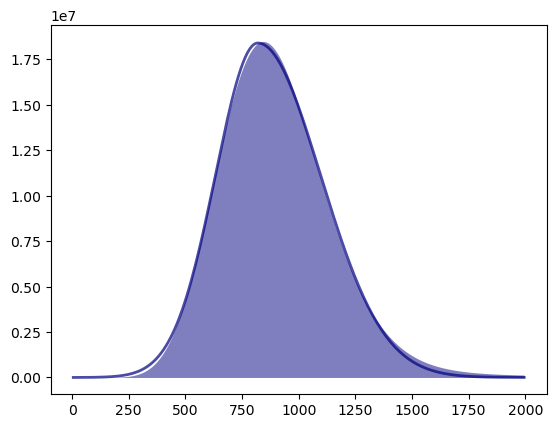

parameters:  [1.84072126e+07 8.19160792e+02 1.86402106e+02 2.76679255e+02]
errors:  [3.68107691e+04 1.34875750e+00 1.18235406e+00 1.27321279e+00]


In [9]:
fit_and_draw(anormal, x, y)

### Usual Gaisser-Hillas function

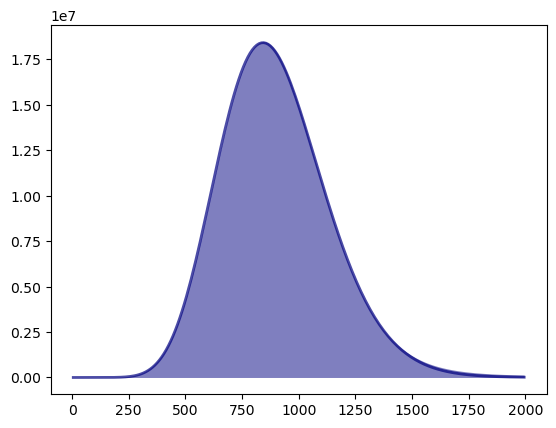

parameters:  [ 1.84259154e+07  8.42318373e+02 -1.15174820e+02  5.55419071e+01]
errors:  [1.62960462e+04 3.71163744e-01 9.70309027e+00 5.79501453e-01]


In [10]:
fit_and_draw(gaisser_hillas, x, y)

### 6-parameter Gaisser-Hillas function

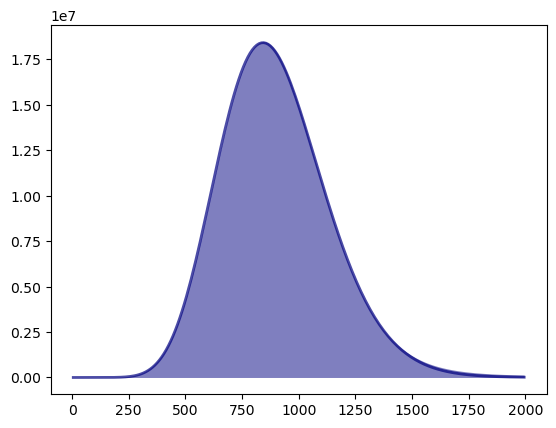

parameters:  [ 1.84259154e+07  8.42318373e+02 -1.15174820e+02  5.55419071e+01]
errors:  [1.62960462e+04 3.71163744e-01 9.70309027e+00 5.79501453e-01]


In [7]:
fit_and_draw(gaisser_hillas_six, x, y)